[0.0, 7.894919286223336e-17, 0.0]


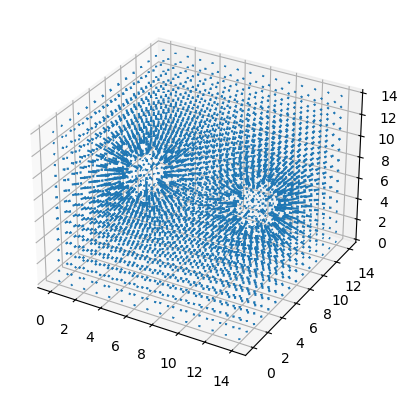

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

def getVectorField(t):
    xes = 15
    yes = 15
    zes = 15
    angularVel = 1
    theta1 = 0 + 5 * t
    cx1, cy1, cz1 = xes//2 + 1.5 * (xes//4) * math.cos(math.radians(theta1)), yes//2 + 1.5 * (xes//4) * math.sin(math.radians(theta1)), zes//2
    cx2, cy2, cz2 = xes//2 + 1.5 * (xes//4) * math.cos(math.radians(theta1 + 180)), yes//2 + 1.5 * (xes//4) * math.sin(math.radians(theta1 + 180)), zes//2
    
    rad = 2.5
    initArray = []
    for z in range(zes):
        initArray.append([[0,0,0]*xes for y in range(yes)])
    
    for x in range(xes):
        for y in range(yes):
            for z in range(zes):
                distance1 = math.sqrt((cx1-x)**2 + (cy1-y)**2 + (cz1-z)**2)
                distance2 = math.sqrt((cx2-x)**2 + (cy2-y)**2 + (cz2-z)**2)
                if (distance1 <= rad or distance2 <= rad):
                    continue
                mag1 = (distance1 * 1/9)**(-2) * 0.1
                mag2 = (distance2 * 1/9)**(-2) * 0.1
                
                dx1 = cx1-x
                dy1 = cy1-y
                dz1 = cz1-z
                magInit1 = math.sqrt(dx1**2 + dy1**2 + dz1**2)
                k1 = mag1/magInit1
                dx1, dy1, dz1 = dx1 * k1, dy1 * k1, dz1 * k1
    
                dx2 = cx2-x
                dy2 = cy2-y
                dz2 = cz2-z
                magInit2 = math.sqrt(dx2**2 + dy2**2 + dz2**2)
                k2 = mag2/magInit2
                dx2, dy2, dz2 = dx2 * k2, dy2 * k2, dz2 * k2
    
                dxNet, dyNet, dzNet = dx1 + dx2, dy1 + dy2, dz1 + dz2
                
                initArray[z][y][x] = [dxNet, dyNet, dzNet]
                # plt.quiver(row, col,dx, dy, width = 0.001, headwidth = 4, headlength = 6, scale = 1, scale_units= 'xy', angles = 'xy')
                #plt.quiver(x, y, z, dxNet, dyNet, dzNet)

    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    for z in range(len(initArray)):
        for y in range(len(initArray[z])):
            for x in range(len(initArray[z][y])):
                if x == xes//2 and y == yes//2 and z == zes//2: print(initArray[z][y][x])
                if type(initArray[z][y][x]) != list: continue
                ax.quiver(x, y, z, initArray[z][y][x][0], initArray[z][y][x][1], initArray[z][y][x][2])
    plt.show()

getVectorField(0)